In [23]:
import torch
from skimage import data

im = data.gravel()
im = im[:128,:128]
im = torch.from_numpy(im)

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import signal
import torch
from skimage import data

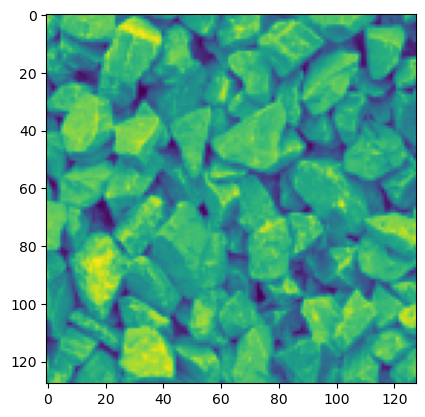

In [49]:
plt.imshow(im)
plt.show()

In [50]:
sobel_x = torch.tensor([[-1,0,1], [-2,0,2], [-1,0,1]], dtype=torch.float32)
sobel_y = torch.tensor([[1,2,1], [0,0,0], [-1,-2,-1]], dtype=torch.float32)

In [51]:
gx = signal.correlate2d(im, sobel_x, mode = 'valid')
gy = signal.correlate2d(im, sobel_y, mode = 'valid')

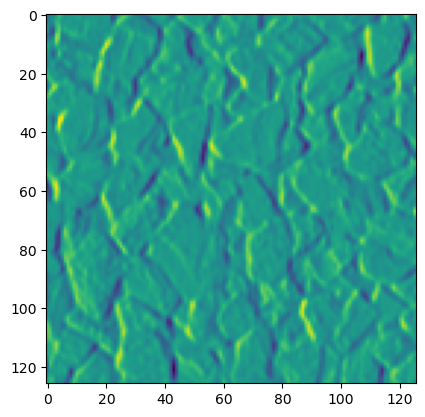

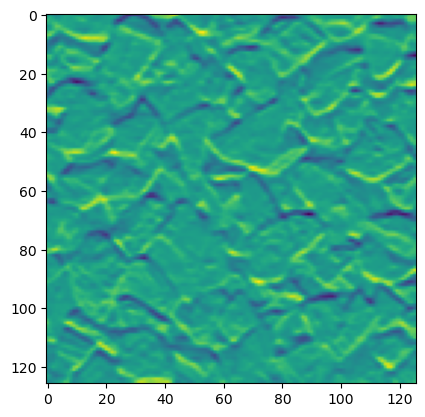

In [52]:
plt.figure()
plt.imshow(gx)

plt.figure()
plt.imshow(gy)

In [53]:
magnitude = np.sqrt((gx)**2+(gy)**2)
magnitude_norm = magnitude/1140

In [54]:
direction = np.arctan2(gy, gx+1e-8)
direction_norm = (direction+np.pi)/(2*np.pi)

In [55]:
hue = direction_norm*255
saturation = np.full_like(direction_norm, 255, dtype=np.uint8)
value = magnitude_norm*255

hsv_image = np.dstack((hue, saturation, value)).clip(0,255).astype(np.uint8)

rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

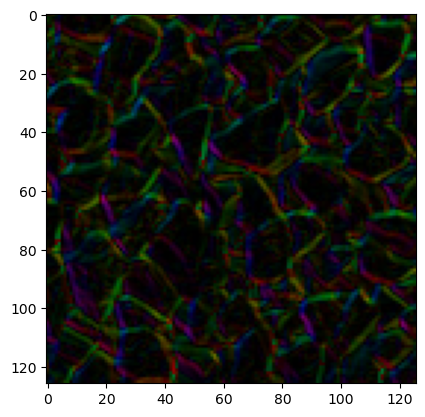

In [56]:
plt.imshow(rgb_image)
plt.show()